In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [3]:
# 파일 불러오기
train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/데이터과학/data/ua.base", sep ='\t', 
            names = ["user", "item", "rating", "timestamp"] )
test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/데이터과학/data/ua.test", sep ='\t', 
            names = ["user", "item", "rating", "timestamp"])

train

,user,item,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
90565,943,1047,2,875502146
90566,943,1074,4,888640250
90567,943,1188,3,888640250
90568,943,1228,3,888640275


In [4]:
users = torch.LongTensor(train['user'])
items = torch.LongTensor(train['item'])
ratings = torch.FloatTensor(train['rating'])

users_test = torch.LongTensor(test['user'])
items_test = torch.LongTensor(test['item'])
ratings_test = torch.FloatTensor(test['rating'])

In [5]:
rank = 10
num_users = users.max() + 1
num_items = items.max() + 1

P = torch.randn(num_users, rank, requires_grad=True)
Q = torch.randn(num_items, rank, requires_grad=True)

optimizer = torch.optim.Adam([P,Q], lr = 0.1)
lambda_P = 0.0001
lambda_Q = 0.0001

X = []
Y = []
Y_test = []
for epoch in range(1001):
  hypo = (P[users] * Q[items]).sum(dim =1)
  mse = F.mse_loss(hypo, ratings)
  cost = mse + lambda_P * (P ** 2).sum() + lambda_Q * (Q ** 2).sum()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():

    hypo_test = (P[users_test] * Q[items_test]).sum(dim =1)
    mse_test = F.mse_loss(hypo_test,ratings_test)
    
    X.append(epoch)
    Y.append(mse.item())
    Y_test.append(mse_test.item())

    if epoch %100 == 0:
      print(f"epoch: {epoch}, mse: {mse.item()}, mse_test: {mse_test.item()}")


epoch: 0, mse: 23.749574661254883, mse_test: 21.884174346923828
epoch: 100, mse: 0.6942727565765381, mse_test: 1.059940218925476
epoch: 200, mse: 0.6442894339561462, mse_test: 1.0591533184051514
epoch: 300, mse: 0.6324588656425476, mse_test: 1.0572795867919922
epoch: 400, mse: 0.6293087601661682, mse_test: 1.056284785270691
epoch: 500, mse: 0.6282594203948975, mse_test: 1.0552417039871216
epoch: 600, mse: 0.627721905708313, mse_test: 1.054957389831543
epoch: 700, mse: 0.6273553371429443, mse_test: 1.0553892850875854
epoch: 800, mse: 0.6270816326141357, mse_test: 1.0557917356491089
epoch: 900, mse: 0.6268617510795593, mse_test: 1.0556210279464722
epoch: 1000, mse: 0.6266477704048157, mse_test: 1.0548129081726074


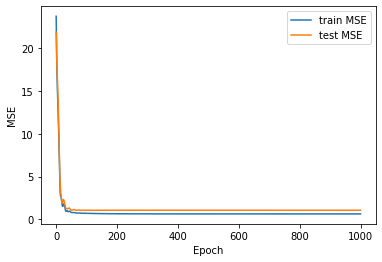

In [6]:
plt.plot(X,Y,label = "train MSE")
plt.plot(X,Y_test,label = "test MSE")

plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")

plt.show()


In [7]:
rank = 10
num_users = users.max() + 1
num_items = items.max() + 1

P = torch.randn(num_users, rank, requires_grad=True)
Q = torch.randn(num_items, rank, requires_grad=True)

bias_user = torch.randn(num_users, requires_grad=True)
bias_item = torch.randn(num_items, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()

optimizer = torch.optim.Adam([P,Q, bias_user, bias_item], lr = 0.1)
lambda_P = 0.0001
lambda_Q = 0.0001
lambda_BU = 0.0001
lambda_BI = 0.0001

X = []
Y = []
Y_test = []
for epoch in range(1001):
  hypo = (P[users] * Q[items]).sum(dim =1) + bias_user[users] + bias_item[items] + mean
  mse = F.mse_loss(hypo, ratings)
  cost = mse + lambda_P * (P ** 2).sum() + lambda_Q * (Q ** 2).sum() + \
  lambda_BU * (bias_user ** 2).sum() + lambda_BI * (bias_item ** 2).sum()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():

    hypo_test = (P[users_test] * Q[items_test]).sum(dim =1) + bias_user[users_test] + bias_item[items_test] + mean
    mse_test = F.mse_loss(hypo_test,ratings_test)
    
    X.append(epoch)
    Y.append(mse.item())
    Y_test.append(mse_test.item())

    if epoch %100 == 0:
      print(f"epoch: {epoch}, mse: {mse.item()}, mse_test: {mse_test.item()}")


epoch: 0, mse: 13.52033519744873, mse_test: 10.398873329162598
epoch: 100, mse: 0.6064679622650146, mse_test: 0.8785268068313599
epoch: 200, mse: 0.5800315737724304, mse_test: 0.8728337287902832
epoch: 300, mse: 0.5753477811813354, mse_test: 0.8717784881591797
epoch: 400, mse: 0.5739485025405884, mse_test: 0.8714883923530579
epoch: 500, mse: 0.5735083818435669, mse_test: 0.8714905977249146
epoch: 600, mse: 0.5733089447021484, mse_test: 0.8715918660163879
epoch: 700, mse: 0.5731699466705322, mse_test: 0.8714272379875183
epoch: 800, mse: 0.5730239152908325, mse_test: 0.8708181977272034
epoch: 900, mse: 0.5728384852409363, mse_test: 0.8700571060180664
epoch: 1000, mse: 0.5726566314697266, mse_test: 0.8694109916687012


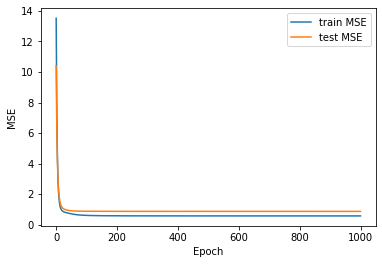

In [8]:
plt.plot(X,Y,label = "train MSE")
plt.plot(X,Y_test,label = "test MSE")

plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")

plt.show()
